In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
from ppo import PPO
from config_utils import get_config
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [3]:
import gym
from gym import wrappers
env = gym.make("CartPole-v1")
"""
observation = env.reset()
for _ in range(100):
  env.render()
  action = env.action_space.sample() # your agent here (this takes random actions)
  observation, reward, done, info = env.step(action)

  if done:
        break
    #observation = env.reset()
env.close()
"""

'\nobservation = env.reset()\nfor _ in range(100):\n  env.render()\n  action = env.action_space.sample() # your agent here (this takes random actions)\n  observation, reward, done, info = env.step(action)\n\n  if done:\n        break\n    #observation = env.reset()\nenv.close()\n'

In [4]:
env.action_space

Discrete(2)

In [39]:
config = get_config("configs/config-2020_06_02.json")
# config = get_config("configs/config-default_mujoco.json")
print(config)

num_epochs = 1200
# num_epochs = 100
minibatch_size = 1

if config.has_training:
    num_epochs = config.training.get("num_epochs", num_epochs)
    minibatch_size = config.training.get("minibatch_size", minibatch_size)
ppo = PPO(env, config)

{'ppo_hyperparameters': {'epsilon': 0.2, 'discount_factor': 0.9, 'delta': 0.95, 'actor_critic': {'actor': {'learning_rate': 0.005}, 'critic': {'learning_rate': 0.005, 'alpha': 0.75}}}}


In [40]:
loss_vals = []
pbar = tqdm(range(num_epochs))
for _ in pbar:
    #for _ in tqdm(range(minibatch_size), desc="minibatch"):
    step_loss_vals = ppo.step()
    loss_vals.append(step_loss_vals[-1])
    pbar.set_description("Loss = {:.6f}".format(loss_vals[-1]))

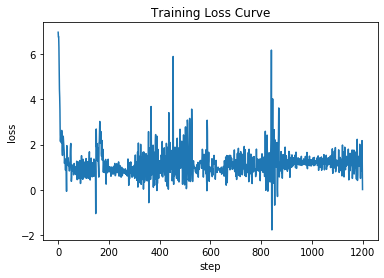

In [41]:
plt.plot(loss_vals)
plt.xlabel("step")
plt.ylabel("loss")
plt.title("Training Loss Curve")
plt.show()

In [42]:
import torch
from torch.autograd import Variable

In [45]:
#env_new = wrappers.Monitor(env, './video/', force = True)
times = 0
env_new = env
observation = env_new.reset()
observation = Variable(torch.from_numpy(observation), requires_grad=False).to(ppo.torch_device)
for _ in range(100):
    env_new.render()
    action = torch.argmax(ppo.pi(observation.float())) 
    observation, reward, done, info = env_new.step(action.cpu().numpy())
    observation = Variable(torch.from_numpy(observation), requires_grad=False).to(ppo.torch_device)
    if not done:
        times += 1
        
print(times)
env_new.close()

100


In [46]:

env_new.close()